In [1]:
from numpy import *
import matplotlib.pyplot as plt
from scipy.io import loadmat
import scipy.optimize as opt
from sklearn.metrics import classification_report

In [2]:
data=loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [3]:
def plot_an_image(image):
    plt.matshow(image.reshape((20,20)).T,cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.show    

this should be 2


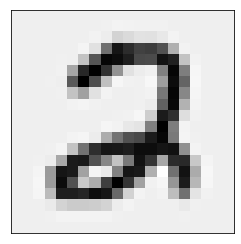

In [4]:
r=random.randint(1,5000)
plot_an_image(data['X'][r,:])
print('this should be {}'.format(data['y'][r,0]))

In [5]:
def plot_100_image(X):
    size=int(sqrt(X.shape[1]))
    rand_index=random.choice(arange(X.shape[0]),100)
    rand_images=X[rand_index,:]
    
    fig,ax=plt.subplots(nrows=10,ncols=10,sharey=True,sharex=True,figsize=(8,8))
    
    for i in range(10):
        for j in range(10):
            ax[i,j].matshow(rand_images[i*10+j].reshape(size,size).T,cmap=plt.cm.binary)
            plt.xticks([])
            plt.yticks([])

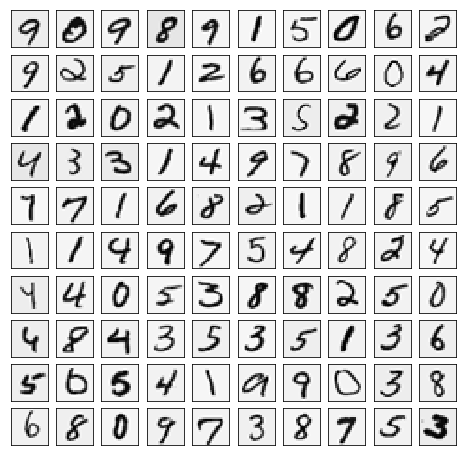

In [6]:
plot_100_image(data['X'])
plt.show()

In [9]:
#prepare data
X=data['X']
X=array([m.reshape((20,20)).T for m in X])
X=array([m.reshape(400) for m in X])
y=data['y']
X=insert(X,0,1,axis=1)
y=y.reshape(y.shape[0])

y_matrix=[]
for k in range(1,11):
    y_matrix.append((y==k).astype(int))
y_matrix=[y_matrix[-1]]+y_matrix[:-1]
y=array(y_matrix)
y.shape

(10, 5000)

In [8]:
def sigmoid(z):
    return 1/(1+exp(-z))

In [9]:
def regularized_cost(theta,X,y,l=1):
    theta_l=theta[l:]
    term=1/(2*len(X))*sum(power(theta_l,2))
    return cost(theta,X,y)+term

In [10]:
def cost(theta,X,y):
    return mean(-y * log(sigmoid(X@theta))-(1-y) * log(1-sigmoid(X@theta)))

In [11]:
def gradient(theta,X,y):
    return (1/len(X))*X.T@(sigmoid(X@theta)-y)

In [12]:
def gradient_cost(theta,X,y,l=1):
    theta_l=theta[l:]
    regularized_theta=(1/len(X))*theta[l:]
    term=concatenate((array([0]),regularized_theta))
    return gradient(theta,X,y)+term


In [13]:
def logistic_regression(X,y):
    theta=zeros(X.shape[1])
    res=opt.minimize(fun=regularized_cost,x0=theta,args=(X,y),method='TNC',jac=gradient_cost)
    return res.x

In [14]:
def predict(x,theta):
    prob=sigmoid(x@theta)
    return [ 1 if p>=0.5 else 0 for p in prob]

In [15]:
t=logistic_regression(X,y[0])
t.shape
y_predict=predict(X,t)
mean(predict(X,t)==y[0])

0.9974

In [16]:
correct=[1 if a==b else 0 for (a,b) in zip(y_predict,y[0])]
sum(correct)/len(correct)

0.9974

In [17]:
# k维
k_theta=array([logistic_regression(X,y[i]) for i in range(10)])
k_theta.shape

(10, 401)

In [18]:
k_predict=sigmoid(X@k_theta.T)
y_pred=argmax(k_predict,axis=1)

In [19]:
answer=data['y'].reshape(5000)
answer[answer==10]=0
answer

array([0, 0, 0, ..., 9, 9, 9], dtype=uint8)

In [20]:
data['y']

array([[0],
       [0],
       [0],
       ...,
       [9],
       [9],
       [9]], dtype=uint8)

In [21]:
print(classification_report(answer, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       500
           1       0.95      0.99      0.97       500
           2       0.95      0.92      0.93       500
           3       0.95      0.91      0.93       500
           4       0.95      0.95      0.95       500
           5       0.92      0.92      0.92       500
           6       0.97      0.98      0.97       500
           7       0.95      0.95      0.95       500
           8       0.93      0.92      0.92       500
           9       0.92      0.92      0.92       500

    accuracy                           0.94      5000
   macro avg       0.94      0.94      0.94      5000
weighted avg       0.94      0.94      0.94      5000



In [23]:
# Neural Network

In [24]:
def loadData(path):
    data=loadmat(path)
    return data['Theta1'],data['Theta2']

In [25]:
theta1,theta2=loadData('ex3weights.mat')
theta1.shape,theta2.shape

((25, 401), (10, 26))

In [35]:
#load data
X=data['X']
X=insert(X,0,1,axis=1)
y=data['y']
y=y.reshape(y.shape[0])
X.shape,y.shape

((5000, 401), (5000,))

In [43]:
#feed data
a1=X

z2=X@theta1.T
z2.shape

a2=sigmoid(z2)
a2.shape
a2=insert(a2,0,1,axis=1)

z3=a2@theta2.T
a3=sigmoid(z3)
a3.shape

(5000, 10)

In [53]:
y_pred=argmax(a3,axis=1)+1
y_pred[y_pred==10]=0
y_pred.shape

(5000,)

In [54]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       500
           1       0.97      0.98      0.98       500
           2       0.98      0.97      0.98       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.97      0.98      0.98       500
           6       0.98      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

